In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
conn = sqlite3.connect("veekun-pokedex.sqlite")
cur = conn.cursor()


In [19]:
cursor=conn.execute("""SELECT name FROM sqlite_master
    WHERE type='table';""")

In [20]:
for r in cursor:
    print(r)

In [16]:
cursor=conn.execute("Select * from pokemon")
pok=[]
for i in cursor:
    pok.append(i)

OperationalError: no such table: pokemon

In [ ]:
pokemon=pd.DataFrame(pok,columns=['id','identifier','species_id','height','weight','base_experience','order','is_default'])
plt.figure(figsize=(10,6))
sns.histplot(data=pokemon['height'],kde=True,bins=15)
plt.xlabel('Height in metres')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data=pokemon['weight'],kde=True,bins=15)
plt.xlabel('weight in lbs')
plt.ylabel('Count')
plt.show()

In [ ]:
cursor=conn.execute("Select p.identifier as name,t.identifier as type from pokemon p inner join pokemon_types pt on p.id=pt.pokemon_id inner join types t on t.id=pt.type_id")
pokemon_types=[]
for i in cursor:
    pokemon_types.append(i)

In [ ]:
pokemon_types


In [ ]:
poke_types=pd.DataFrame(pokemon_types,columns=['pokemon','type'])

In [ ]:
poke_types

In [ ]:
a=poke_types.groupby(['type'],as_index=False)['pokemon'].count()
a

In [ ]:
plt.figure(figsize=(15,7))
a.plot(kind='bar')
l=[i for i in range(0,18)]
plt.xticks(l,a['type'].tolist())
plt.xlabel('types of pokemon')
plt.ylabel('count')
plt.show()

In [ ]:
len(a['type'].tolist())

In [17]:
cursor=conn.execute("select * from pokemon_species")
species=[]
for i in cursor:
    species.append(i)

In [18]:
species


[(1, 'bulbasaur', 1, None, 1, 5, 8, 3, 1, 45, 70, 0, 20, 0, 4, 0, 1, None),
 (2, 'ivysaur', 1, 1, 1, 5, 8, 3, 1, 45, 70, 0, 20, 0, 4, 0, 2, None),
 (3, 'venusaur', 1, 2, 1, 5, 8, 3, 1, 45, 70, 0, 20, 1, 4, 1, 3, None),
 (4, 'charmander', 1, None, 2, 8, 6, 4, 1, 45, 70, 0, 20, 0, 4, 0, 4, 109),
 (5, 'charmeleon', 1, 4, 2, 8, 6, 4, 1, 45, 70, 0, 20, 0, 4, 0, 5, 110),
 (6, 'charizard', 1, 5, 2, 8, 6, 4, 1, 45, 70, 0, 20, 0, 4, 1, 6, 111),
 (7, 'squirtle', 1, None, 3, 2, 6, 9, 1, 45, 70, 0, 20, 0, 4, 0, 7, None),
 (8, 'wartortle', 1, 7, 3, 2, 6, 9, 1, 45, 70, 0, 20, 0, 4, 0, 8, None),
 (9, 'blastoise', 1, 8, 3, 2, 6, 9, 1, 45, 70, 0, 20, 0, 4, 1, 9, None),
 (10, 'caterpie', 1, None, 4, 5, 2, 2, 4, 255, 70, 0, 15, 0, 2, 0, 10, None),
 (11, 'metapod', 1, 10, 4, 5, 2, 2, 4, 120, 70, 0, 15, 0, 2, 0, 11, None),
 (12, 'butterfree', 1, 11, 4, 9, 13, 2, 4, 45, 70, 0, 15, 1, 2, 0, 12, None),
 (13, 'weedle', 1, None, 5, 3, 2, 2, 4, 255, 70, 0, 15, 0, 2, 0, 13, None),
 (14, 'kakuna', 1, 13, 5, 10, 2,

In [25]:
li=['id','identifier','generation_id','evolves_from_species','evolution_chain_id','color_id','shape_id','habitat_id','gender_rate','capture_rate','base_happiness','is_baby','hatch_counter','has_gender_differences','growth_rate_id','forms_switchable','order','conquest_order']


In [26]:
len(li)

18

In [30]:
pok_species=pd.DataFrame(species,columns=li)
pok_species

,id,identifier,generation_id,evolves_from_species,evolution_chain_id,color_id,shape_id,habitat_id,gender_rate,capture_rate,base_happiness,is_baby,hatch_counter,has_gender_differences,growth_rate_id,forms_switchable,order,conquest_order
0,1,bulbasaur,1,NaN,1,5,8,3.0,1,45,70,0,20,0,4,0,1,NaN
1,2,ivysaur,1,1.0,1,5,8,3.0,1,45,70,0,20,0,4,0,2,NaN
2,3,venusaur,1,2.0,1,5,8,3.0,1,45,70,0,20,1,4,1,3,NaN
3,4,charmander,1,NaN,2,8,6,4.0,1,45,70,0,20,0,4,0,4,109.0
4,5,charmeleon,1,4.0,2,8,6,4.0,1,45,70,0,20,0,4,0,5,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,yveltal,6,NaN,369,8,9,NaN,-1,45,0,0,120,0,1,0,717,NaN
717,718,zygarde,6,NaN,370,5,2,NaN,-1,3,0,0,120,0,1,0,718,NaN
718,719,diancie,6,NaN,371,6,4,NaN,-1,3,70,0,25,0,1,1,719,NaN
719,720,hoopa,6,NaN,372,7,1,NaN,-1,3,100,0,120,0,1,0,720,NaN


In [32]:
pok_species['habitat_id'].value_counts()

3.0    80
2.0    71
9.0    47
4.0    45
7.0    40
8.0    37
1.0    29
6.0    27
5.0    10
Name: habitat_id, dtype: int64

In [33]:
cursor=conn.execute("select ps.id,ps.identifier,ph.identifier from pokemon_species ps Inner Join pokemon_habitats ph on ps.habitat_id=ph.id")
ps=[]
for i in cursor:
    ps.append(i)

In [34]:
ps

[(1, 'bulbasaur', 'grassland'),
 (2, 'ivysaur', 'grassland'),
 (3, 'venusaur', 'grassland'),
 (4, 'charmander', 'mountain'),
 (5, 'charmeleon', 'mountain'),
 (6, 'charizard', 'mountain'),
 (7, 'squirtle', 'waters-edge'),
 (8, 'wartortle', 'waters-edge'),
 (9, 'blastoise', 'waters-edge'),
 (10, 'caterpie', 'forest'),
 (11, 'metapod', 'forest'),
 (12, 'butterfree', 'forest'),
 (13, 'weedle', 'forest'),
 (14, 'kakuna', 'forest'),
 (15, 'beedrill', 'forest'),
 (16, 'pidgey', 'forest'),
 (17, 'pidgeotto', 'forest'),
 (18, 'pidgeot', 'forest'),
 (19, 'rattata', 'grassland'),
 (20, 'raticate', 'grassland'),
 (21, 'spearow', 'rough-terrain'),
 (22, 'fearow', 'rough-terrain'),
 (23, 'ekans', 'grassland'),
 (24, 'arbok', 'grassland'),
 (25, 'pikachu', 'forest'),
 (26, 'raichu', 'forest'),
 (27, 'sandshrew', 'rough-terrain'),
 (28, 'sandslash', 'rough-terrain'),
 (29, 'nidoran-f', 'grassland'),
 (30, 'nidorina', 'grassland'),
 (31, 'nidoqueen', 'grassland'),
 (32, 'nidoran-m', 'grassland'),
 (33,

In [35]:
pok_habitats=pd.DataFrame(ps,columns=['id','pokemon','Habitat'])

In [39]:
h=pok_habitats.groupby(['Habitat'],as_index=False)['pokemon'].count()

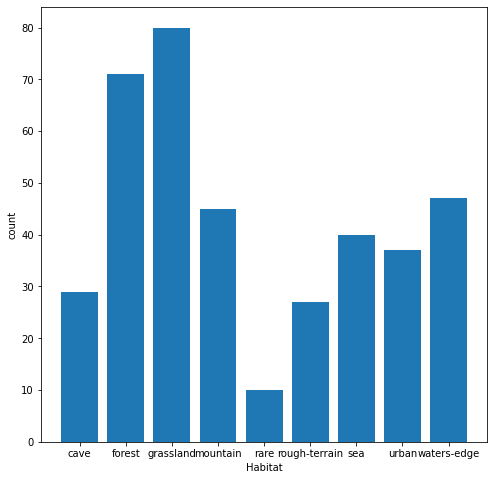

In [68]:
plt.figure(figsize=(8,8))
plt.bar(h['Habitat'],h['pokemon'])
plt.xlabel('Habitat')
plt.ylabel('count')
plt.show()

In [48]:
cursor=conn.execute("select ps.identifier,pc.identifier from pokemon_species ps Inner Join pokemon_colors pc on ps.color_id=pc.id")
pc=[]
for i in cursor:
    pc.append(i)

In [49]:
pc

[('bulbasaur', 'green'),
 ('ivysaur', 'green'),
 ('venusaur', 'green'),
 ('charmander', 'red'),
 ('charmeleon', 'red'),
 ('charizard', 'red'),
 ('squirtle', 'blue'),
 ('wartortle', 'blue'),
 ('blastoise', 'blue'),
 ('caterpie', 'green'),
 ('metapod', 'green'),
 ('butterfree', 'white'),
 ('weedle', 'brown'),
 ('kakuna', 'yellow'),
 ('beedrill', 'yellow'),
 ('pidgey', 'brown'),
 ('pidgeotto', 'brown'),
 ('pidgeot', 'brown'),
 ('rattata', 'purple'),
 ('raticate', 'brown'),
 ('spearow', 'brown'),
 ('fearow', 'brown'),
 ('ekans', 'purple'),
 ('arbok', 'purple'),
 ('pikachu', 'yellow'),
 ('raichu', 'yellow'),
 ('sandshrew', 'yellow'),
 ('sandslash', 'yellow'),
 ('nidoran-f', 'blue'),
 ('nidorina', 'blue'),
 ('nidoqueen', 'blue'),
 ('nidoran-m', 'purple'),
 ('nidorino', 'purple'),
 ('nidoking', 'purple'),
 ('clefairy', 'pink'),
 ('clefable', 'pink'),
 ('vulpix', 'brown'),
 ('ninetales', 'yellow'),
 ('jigglypuff', 'pink'),
 ('wigglytuff', 'pink'),
 ('zubat', 'purple'),
 ('golbat', 'purple'),
 

In [50]:
pok_colors=pd.DataFrame(pc,columns=['pokemon','color'])
a=pok_colors.groupby(['color'],as_index=False)['pokemon'].count()

In [51]:
a

,color,pokemon
0,black,32
1,blue,134
2,brown,111
3,gray,67
4,green,79
5,pink,41
6,purple,64
7,red,75
8,white,54
9,yellow,64


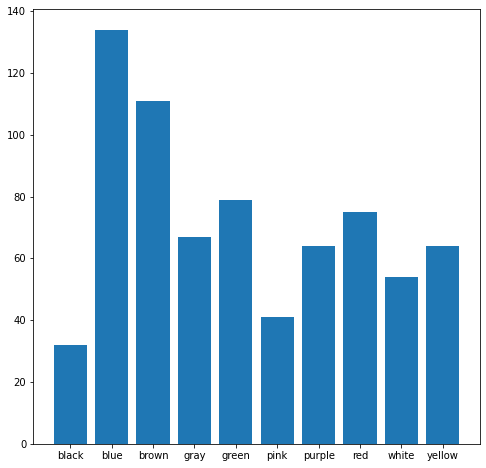

In [53]:
plt.figure(figsize=(8,8))
plt.bar(a['color'],a['pokemon'])
plt.show()